## <center>Linear Regression Example</center>

### Importing Needed packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


### Understanding the Data

#### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODEL YEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


In [2]:
df = pd.read_csv("FuelConsumption.csv", engine='python')
df.head()

,Model,Make,Model.1,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2 Emissions,CO2,Smog
0,Year,NaN,NaN,NaN,(L),NaN,NaN,Type,City (L/100 km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),(g/km),Rating,Rating
1,2020,Acura,ILX,Compact,2.4,4.0,AM8,Z,9.9,7,8.6,33,199,6,3
2,2020,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS9,Z,12.3,9.2,10.9,26,254,4,3
3,2020,Acura,MDX SH-AWD A-SPEC,SUV: Small,3.5,6.0,AS9,Z,12.2,9.5,11,26,258,4,3
4,2020,Acura,MDX Hybrid AWD,SUV: Small,3,6.0,AM7,Z,9.1,9,9,31,210,5,3


### Handling column names

In [3]:
df.drop(df.index[:1], inplace=True)
df.rename(columns={'Model': 'Model Year', 
                   'Model.1': 'Model', 
                   'Engine Size': 'Engine Size(L)',
                   'Fuel': 'Fuel Type',
                   'Fuel Consumption': 'Fuel Cons(City)',
                   'Unnamed: 9': 'Fuel Cons(Hwy)',
                   'Unnamed: 10': 'Fuel Cons(Comb)',
                   'Unnamed: 11': 'Fuel Cons(MPG)',
                   'CO2 Emissions': 'CO2 Emissions(g/km)'}, inplace=True)
df.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Cons(City),Fuel Cons(Hwy),Fuel Cons(Comb),Fuel Cons(MPG),CO2 Emissions(g/km),CO2,Smog
1,2020,Acura,ILX,Compact,2.4,4.0,AM8,Z,9.9,7,8.6,33,199,6,3
2,2020,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS9,Z,12.3,9.2,10.9,26,254,4,3
3,2020,Acura,MDX SH-AWD A-SPEC,SUV: Small,3.5,6.0,AS9,Z,12.2,9.5,11,26,258,4,3
4,2020,Acura,MDX Hybrid AWD,SUV: Small,3,6.0,AM7,Z,9.1,9,9,31,210,5,3
5,2020,Acura,RDX AWD,SUV: Small,2,4.0,AS10,Z,11,8.6,9.9,29,232,5,6


### Converting Strings numeric column values to Floats

In [4]:
df['Engine Size(L)'] = df['Engine Size(L)'].astype(float)
df['Fuel Cons(City)'] = df['Fuel Cons(City)'].astype(float)
df['Fuel Cons(Hwy)'] = df['Fuel Cons(Hwy)'].astype(float)
df['Fuel Cons(Comb)'] = df['Fuel Cons(Comb)'].astype(float)
df['Fuel Cons(MPG)'] = df['Fuel Cons(MPG)'].astype(float)
df['CO2 Emissions(g/km)'] = df['CO2 Emissions(g/km)'].astype(float)
df['CO2'] = df['CO2'].astype(float)
df['Smog'] = df['Smog'].astype(float)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 901 entries, 1 to 901
Data columns (total 15 columns):
Model Year             886 non-null object
Make                   899 non-null object
Model                  878 non-null object
Vehicle Class          878 non-null object
Engine Size(L)         878 non-null float64
Cylinders              878 non-null float64
Transmission           878 non-null object
Fuel Type              878 non-null object
Fuel Cons(City)        878 non-null float64
Fuel Cons(Hwy)         878 non-null float64
Fuel Cons(Comb)        878 non-null float64
Fuel Cons(MPG)         878 non-null float64
CO2 Emissions(g/km)    878 non-null float64
CO2                    878 non-null float64
Smog                   878 non-null float64
dtypes: float64(9), object(6)
memory usage: 112.6+ KB


### Handling missing values

In [6]:
df.isnull().sum()

Model Year             15
Make                    2
Model                  23
Vehicle Class          23
Engine Size(L)         23
Cylinders              23
Transmission           23
Fuel Type              23
Fuel Cons(City)        23
Fuel Cons(Hwy)         23
Fuel Cons(Comb)        23
Fuel Cons(MPG)         23
CO2 Emissions(g/km)    23
CO2                    23
Smog                   23
dtype: int64

In [7]:
Model_NAN = df[df['Model'].isnull()]
Model_NAN

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Cons(City),Fuel Cons(Hwy),Fuel Cons(Comb),Fuel Cons(MPG),CO2 Emissions(g/km),CO2,Smog
879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
880,Understanding the table,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
881,Model,4WD/4X4 = Four-wheel drive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
882,NaN,AWD = All-wheel drive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
883,NaN,FFV = Flexible-fuel vehicle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
884,NaN,SWB = Short wheelbase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
885,NaN,LWB = Long wheelbase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886,NaN,EWB = Extended wheelbase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
887,Transmission,A = automatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
888,NaN,AM = automated manual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df = df.iloc[:878]
df.isnull().sum()

Model Year             0
Make                   0
Model                  0
Vehicle Class          0
Engine Size(L)         0
Cylinders              0
Transmission           0
Fuel Type              0
Fuel Cons(City)        0
Fuel Cons(Hwy)         0
Fuel Cons(Comb)        0
Fuel Cons(MPG)         0
CO2 Emissions(g/km)    0
CO2                    0
Smog                   0
dtype: int64

### Encoding categorical features.

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [10]:
df['Transmission'] = df['Transmission'].astype(str)
df['Transmission']=le.fit_transform(df['Transmission'])

In [11]:
df['Fuel Type'] = df['Fuel Type'].astype(str)
df['Fuel Type']=le.fit_transform(df['Fuel Type'])

In [12]:
df['Vehicle Class'] = df['Vehicle Class'].astype(str)
df['Vehicle Class']=le.fit_transform(df['Vehicle Class'])

In [13]:
df.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Cons(City),Fuel Cons(Hwy),Fuel Cons(Comb),Fuel Cons(MPG),CO2 Emissions(g/km),CO2,Smog
1,2020,Acura,ILX,0,2.4,4.0,9,3,9.9,7.0,8.6,33.0,199.0,6.0,3.0
2,2020,Acura,MDX SH-AWD,7,3.5,6.0,15,3,12.3,9.2,10.9,26.0,254.0,4.0,3.0
3,2020,Acura,MDX SH-AWD A-SPEC,7,3.5,6.0,15,3,12.2,9.5,11.0,26.0,258.0,4.0,3.0
4,2020,Acura,MDX Hybrid AWD,7,3.0,6.0,8,3,9.1,9.0,9.0,31.0,210.0,5.0,3.0
5,2020,Acura,RDX AWD,7,2.0,4.0,10,3,11.0,8.6,9.9,29.0,232.0,5.0,6.0


### Data Exploration

In [14]:
df.shape

(878, 15)

In [15]:
data=df[['Vehicle Class','Engine Size(L)','Cylinders','Transmission','Fuel Type','Fuel Cons(Comb)','Fuel Cons(MPG)','CO2 Emissions(g/km)']]
data.head()

,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Cons(Comb),Fuel Cons(MPG),CO2 Emissions(g/km)
1,0,2.4,4.0,9,3,8.6,33.0,199.0
2,7,3.5,6.0,15,3,10.9,26.0,254.0
3,7,3.5,6.0,15,3,11.0,26.0,258.0
4,7,3.0,6.0,8,3,9.0,31.0,210.0
5,7,2.0,4.0,10,3,9.9,29.0,232.0


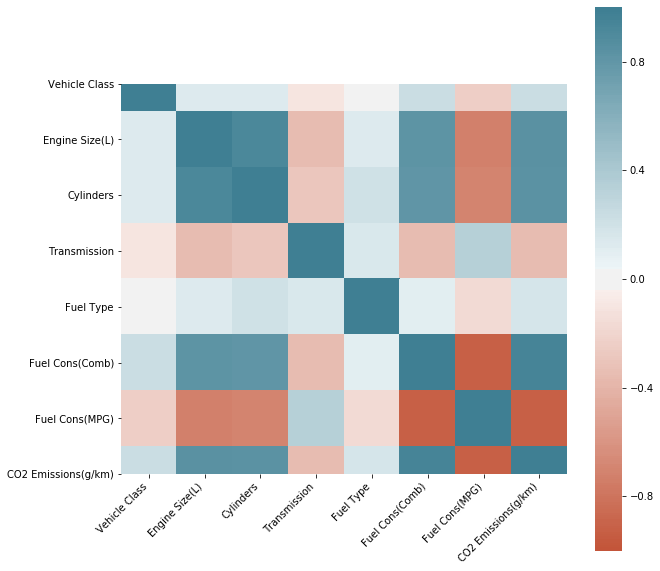

In [16]:
import seaborn as sns
corr = data.corr()

c= pl.figure(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [17]:
corr

,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Cons(Comb),Fuel Cons(MPG),CO2 Emissions(g/km)
Vehicle Class,1.000000,0.127987,0.118831,-0.105657,0.026487,0.232829,-0.246793,0.233006
Engine Size(L),0.127987,1.000000,0.923355,-0.353023,0.120806,0.823159,-0.720597,0.838766
Cylinders,0.118831,0.923355,1.000000,-0.293298,0.206478,0.808996,-0.698934,0.833765
Transmission,-0.105657,-0.353023,-0.293298,1.000000,0.155377,-0.356528,0.337495,-0.355596
Fuel Type,0.026487,0.120806,0.206478,0.155377,1.000000,0.104800,-0.163213,0.173788
Fuel Cons(Comb),0.232829,0.823159,0.808996,-0.356528,0.104800,1.000000,-0.918279,0.951337
Fuel Cons(MPG),-0.246793,-0.720597,-0.698934,0.337495,-0.163213,-0.918279,1.000000,-0.917863
CO2 Emissions(g/km),0.233006,0.838766,0.833765,-0.355596,0.173788,0.951337,-0.917863,1.000000


In [18]:
data.corr()['CO2 Emissions(g/km)'].sort_values()

Fuel Cons(MPG)        -0.917863
Transmission          -0.355596
Fuel Type              0.173788
Vehicle Class          0.233006
Cylinders              0.833765
Engine Size(L)         0.838766
Fuel Cons(Comb)        0.951337
CO2 Emissions(g/km)    1.000000
Name: CO2 Emissions(g/km), dtype: float64

Text(0.5, 1.0, 'Engine Size(L)')

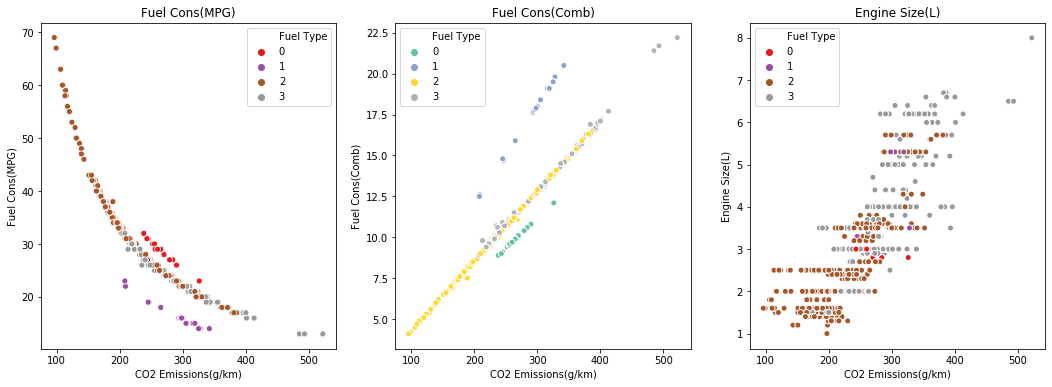

In [19]:
f, (ax1, ax2, ax3) = pl.subplots(ncols=3, figsize=(18,6))

sns.scatterplot(x="CO2 Emissions(g/km)", y="Fuel Cons(MPG)", hue="Fuel Type", data=data, ax=ax1, palette="Set1")
ax1.set_title('Fuel Cons(MPG)')

sns.scatterplot(x="CO2 Emissions(g/km)", y="Fuel Cons(Comb)", hue="Fuel Type", linewidth=1, data=data, ax=ax2, palette="Set2")
ax2.set_title('Fuel Cons(Comb)')

sns.scatterplot(x="CO2 Emissions(g/km)", y="Engine Size(L)", hue="Fuel Type", linewidth=1, data=data, ax=ax3, palette="Set1")
ax3.set_title('Engine Size(L)')

Text(0.5, 1.0, 'Transmission')

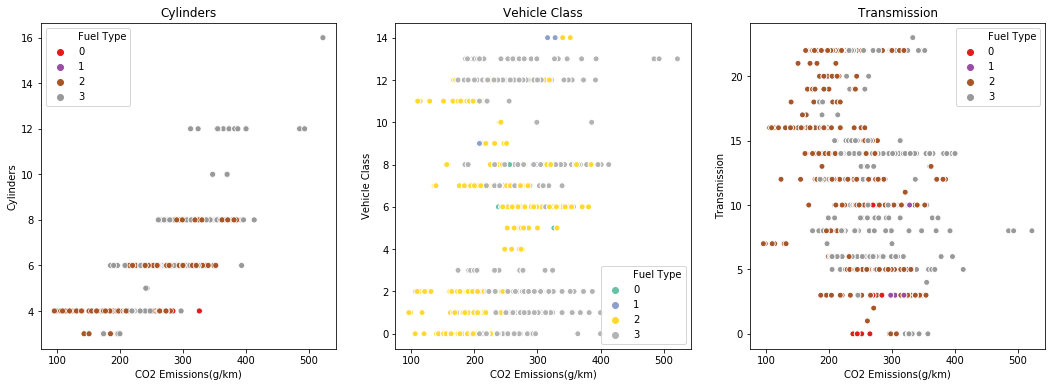

In [20]:
f, (ax1, ax2, ax3) = pl.subplots(ncols=3, figsize=(18,6))

sns.scatterplot(x="CO2 Emissions(g/km)", y="Cylinders", hue="Fuel Type", data=data, ax=ax1, palette="Set1")
ax1.set_title('Cylinders')

sns.scatterplot(x="CO2 Emissions(g/km)", y="Vehicle Class", hue="Fuel Type", linewidth=1, data=data, ax=ax2, palette="Set2")
ax2.set_title('Vehicle Class')

sns.scatterplot(x="CO2 Emissions(g/km)", y="Transmission", hue="Fuel Type", linewidth=1, data=data, ax=ax3, palette="Set1")
ax3.set_title('Transmission')

In [21]:
#No Vehicle Class, Transmission

data=df[['Engine Size(L)','Cylinders','Fuel Type','Fuel Cons(Comb)','Fuel Cons(MPG)','CO2 Emissions(g/km)']]
data.head()

,Engine Size(L),Cylinders,Fuel Type,Fuel Cons(Comb),Fuel Cons(MPG),CO2 Emissions(g/km)
1,2.4,4.0,3,8.6,33.0,199.0
2,3.5,6.0,3,10.9,26.0,254.0
3,3.5,6.0,3,11.0,26.0,258.0
4,3.0,6.0,3,9.0,31.0,210.0
5,2.0,4.0,3,9.9,29.0,232.0


### Linear Regression Modeling

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [23]:
X = data.drop('CO2 Emissions(g/km)', axis = 1)
y = data['CO2 Emissions(g/km)']

Splitting to train and test datasets

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [25]:
print("X_train Shape: ",X_train.shape)
print("X_test Shape: ", X_test.shape)

X_train Shape:  (702, 5)
X_test Shape:  (176, 5)


In [26]:
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ", y_test.shape)

y_train Shape:  (702,)
y_test Shape:  (176,)


### Linear Regression

In [27]:
lr = LinearRegression().fit(X_train,y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(lr.score(X_test,y_test))

0.9205669297527308


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 1 to 878
Data columns (total 6 columns):
Engine Size(L)         878 non-null float64
Cylinders              878 non-null float64
Fuel Type              878 non-null int32
Fuel Cons(Comb)        878 non-null float64
Fuel Cons(MPG)         878 non-null float64
CO2 Emissions(g/km)    878 non-null float64
dtypes: float64(5), int32(1)
memory usage: 44.6 KB


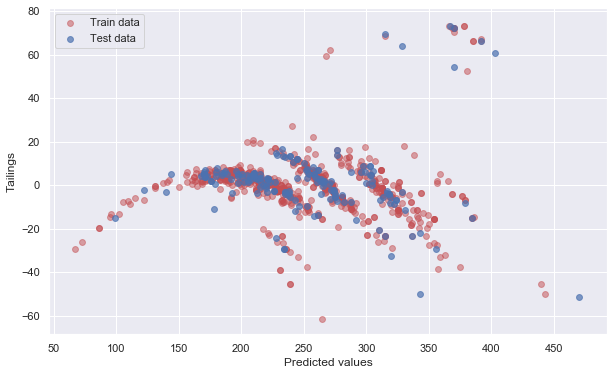

In [33]:
sns.set(style="darkgrid")

pl.figure(figsize=(10,6))

pl.scatter(y_train_pred,y_train_pred - y_train,
          c = 'r', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
pl.scatter(y_test_pred,y_test_pred - y_test,
          c = 'b', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
pl.xlabel('Predicted values')
pl.ylabel('Tailings')
pl.legend(loc = 'upper left')
pl.show()

### Polynomial Regression

In [35]:
from sklearn.preprocessing import PolynomialFeatures

In [36]:
pf = PolynomialFeatures (2)
X_pf = pf.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X_pf,y, random_state = 42)

plr = LinearRegression().fit(X_train,y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,y_test))

0.9843468575167278


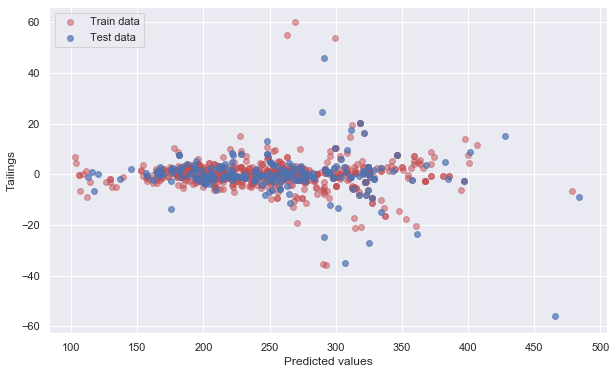

In [37]:
pl.figure(figsize=(10,6))

pl.scatter(Y_train_pred,Y_train_pred - y_train,
          c = 'r', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
pl.scatter(Y_test_pred,Y_test_pred - y_test,
          c = 'b', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
pl.xlabel('Predicted values')
pl.ylabel('Tailings')
pl.legend(loc = 'upper left')
pl.show()

### Random Forest Regressor

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
r = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [41]:
r.fit(X_train,y_train)  

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [45]:
r_train_pred = r.predict(X_train)
r_test_pred = r.predict(X_test)

In [43]:
from sklearn.metrics import r2_score,mean_squared_error

In [46]:
print('MSE Train Data: %.3f' % mean_squared_error(y_train,r_train_pred))
print('MSE Test Data: %.3f' % mean_squared_error(y_test,r_test_pred))
print('R2 Train Data: %.3f' % r2_score(y_train,r_train_pred))
print('R2 Test Data: %.3f' % r2_score(y_test,r_test_pred))

MSE Train Data: 5.738
MSE Test Data: 41.345
R2 Train Data: 0.998
R2 Test Data: 0.989


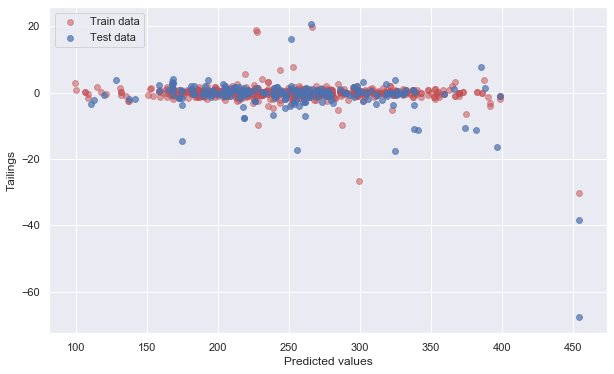

In [47]:
pl.figure(figsize=(10,6))

pl.scatter(r_train_pred,r_train_pred - y_train,
          c = 'r', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
pl.scatter(r_test_pred,r_test_pred - y_test,
          c = 'b', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
pl.xlabel('Predicted values')
pl.ylabel('Tailings')
pl.legend(loc = 'upper left')
#pl.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
pl.show()